## 第一个作业
求解方程
$\left\{\begin{matrix}
 u_t+(\frac{u^2}{2} )_x=0
\\u(x,0)=sin\pi x
\end{matrix}\right.$  求 $u(x,\frac{0.5}{\pi})$

解得 $u=sin(\pi x-0.5 u)$ 其中 $x\in (0,2)$

In [2]:
#导出 各种库 
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *

Text(0, 0.5, '$u$')

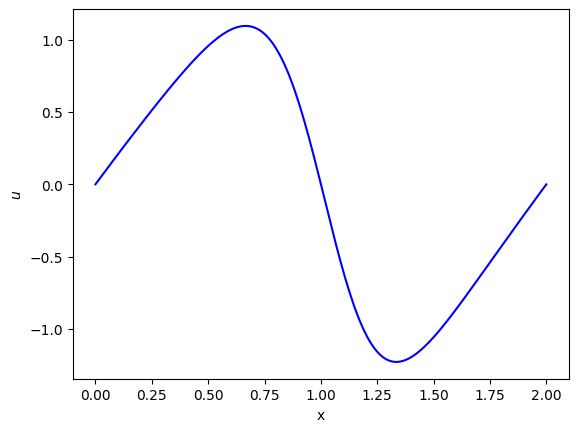

In [4]:

x1=np.linspace(0,2,200)#x 剖分200份
#定义函数 
#初始化条件
u0=0.2
u_list=[u0]
u1_list=[]#存放u的值
for i in range(len(x1)):
    
    def df(u):
        f=1+0.5*cos(np.pi*x1[i]-0.5*u)
        return f
        pass
    def f(u):
        f=u-sin(np.pi*x1[i]-0.5*u)
        return f
        pass
    while True:
        
        u1=u0-f(u0)/df(u0)#迭代出新的值
        u_list.append(u1)

        if len(u_list)>1:
            err=u_list[-1]-u_list[-2]
            if err==0:
                u1=u_list[-1]
                break
            else:
                pass
            pass
        else:
            pass
    u1_list.append(u1)
    pass
#画图
plt.plot(x1,u1_list,'-b')
plt.xlabel('x')
plt.ylabel('$u$')

## 第二个作业

热传导方程 $\begin{cases}
u_t+u_x=0
 \\
u(x，0)=sin\pi x
\end{cases}
0\le x\le 2$

Burgers 方程
$\begin{cases}
 u_t+(\frac{1}{2}u^2)=0\\
u(x,0)=0.5+sin(\pi x)
\end{cases}0\le x\le 2$


用三阶有限体积WENO格式计算精度

In [61]:
#定义WENO函数
def WENO3(u_,u0,u1,dx):
    q0=1.5*u0-0.5*u_
    q1=0.5*u0+0.5*u1
    gama1=1/3
    gama2=2/3
    beta1=(u0-u_)**2*dx
    beta2=(u1-u0)**2*dx
    erro=1e-6
    omega1=gama1/((beta1+erro)**2)
    omega2=gama2/((beta2+erro)**2)
    sum=omega1+omega2
    omega1=omega1/sum
    omega2=omega2/sum
    U=omega1*q0+omega2*q1
    #U=gama1*q0+gama2*q1
    return U
    pass


In [62]:
#3阶
#热传导方程
N=20
T=2
for k in range(8):
    dx=2/N
    t=0
    adx=1/dx
    err1=np.zeros([8])
    err2=np.zeros([8])
    eo1=np.zeros([8])
    eo2=np.zeros([8])

    x=np.zeros([N+8,1])
    average_u=np.zeros([N+8,3])
    exact=np.zeros([N+8,1])
    for i in range(N+7):
        x[i]=(i-4)*dx
        average_u[i,0]=(np.sin(np.pi*(x[i]-dx/2))-np.cos(np.pi*(x[i]+dx/2)))/(np.pi*dx)
        exact[i]=(np.cos(np.pi*(x[i]-dx/2))-np.cos(np.pi*(x[i]+dx/2)))/(np.pi*dx)
        pass
    icc=0
    while t<T:#更新边界
        for i in range(4):
            average_u[i,icc]=average_u[N+i,icc]
            pass
        for i in range(4,7):
            average_u[N+i,icc]=average_u[i,icc]
            pass
        aa=1
        dt=0.9*aa*dx
        if (t+dt)>T :
            dt=T-t
            pass
        Restructure_u=np.zeros([N+7,1])
        for i in range(1,N+6):
            Restructure_u[i]=WENO3(average_u[i-1,icc],average_u[i,icc],average_u[i+1,icc],dx)
            pass
        rhs=np.zeros([N+7,1])
        for i in range(2,N+6):
            rhs[i]=-(Restructure_u[i]-Restructure_u[i-1])*adx
            pass
        if icc==0:
            for i in range(2,N+6):
                average_u[i,1]=average_u[i,0]+dt*rhs[i]
                pass
            icc=1
            pass
        elif icc==1:
            for i in range(2,N+6):
                average_u[i,2]=0.25*(average_u[i,1]+dt*rhs[i])+0.75*average_u[i,0]
                pass
            icc=2
            pass
        elif icc==2:
            for i in range(2,N+6):
                average_u[i,0]=(2*(average_u[i,2]+dt*rhs[i])+average_u[i,0])/3 
                pass
            icc=1
            t+=dt
            pass
        pass
    pass


for i in range(3,N+3):
    err1[k]=err1[k]+abs(exact[i]-average_u[i,0])
    err2[k]=max(abs(exact[i]-average_u[i,0]),err2[k])
    pass
err1[k]=err1[k]/N
if k!=0:
    eo1[k]=np.log(err1[k-1]/err1[k])/np.log(2)
    eo2[k]=np.log(err2[k-1]/err2[k])/np.log(2)
    pass
N=N*2
pass
print(err1)
print(err2)
print(eo1)
print(eo2)


[0.         0.         0.         0.         0.         0.
 0.         3.01458692]
[0.        0.        0.        0.        0.        0.        0.
 4.5858136]
[  0.   0.   0.   0.   0.   0.   0. -inf]
[  0.   0.   0.   0.   0.   0.   0. -inf]


/var/folders/nn/lr5td5393gg0lt4ddnbj8pbr0000gn/T/ipykernel_99544/2410868493.py:72: RuntimeWarning: divide by zero encountered in log
  eo1[k]=np.log(err1[k-1]/err1[k])/np.log(2)
/var/folders/nn/lr5td5393gg0lt4ddnbj8pbr0000gn/T/ipykernel_99544/2410868493.py:73: RuntimeWarning: divide by zero encountered in log
  eo2[k]=np.log(err2[k-1]/err2[k])/np.log(2)


In [72]:
#定义函数
def WENO33(u0,u1,u2,dx):
    q0=0.5*u0+0.5*u1
    q1=1.5*u1-0.5*u2
    gama1=2/3 
    gama2=1/3 
    beta1=(u1-u0)**2*dx 
    beta2=(u2-u1)**2*dx 
    err=1e-6
    omega1=gama1/((beta1+err)**2)
    omega2=gama2/((beta2+err)**2)
    sum=omega1+omega2
    omega1=omega1/sum
    omega2=omega2/sum
    U=omega1*q0+omega2*q1
    return U
    pass

In [77]:
#定义Burgers
def Burgers(u0,x,t):
    temp0=u0-0.5-np.sin(np.pi*(x-u0*t))
    temp1=1+np.pi*t*np.cos(np.pi*(x-u0*t))
    ut=u0
    while abs(temp0)>1e-14:
        ut=ut-temp0/temp1
        temp0=ut-0.5-np.sin(np.pi*(x-ut*t))
        temp1=1+np.pi*t*np.cos(np.pi*(x-ut*t))
        pass
    return ut
pass

In [117]:
#Burgers 代码
ext=5
n=40
cfl=0.6
eps=1e-6
k=1
error=np.zeros([20,5])
order=np.zeros([20,4])

while n<10241:
    dx=2/n
    et=0.5/np.pi
    icc=0
    x1=np.arange(dx,2+dx,dx)
    x=(ext-0.5)*dx-(ext-0.5)*x1
    print(np.size(x))
    u=np.zeros([n+2*ext,3])
    eu=np.zeros([n+2*ext,1])
    fm=np.zeros([n+2*ext,1])
    fp=np.zeros([n+2*ext,1])
    flm=np.zeros([n+2*ext,1])
    flp=np.zeros([n+2*ext,1])
    fl=np.zeros([n+2*ext,1])
    rhs=np.zeros([n+2*ext,1])
    for i in range(ext-1,ext+n):
        u[i,icc]=-(np.cos(np.pi*x[i-ext])-np.cos(np.pi*x[i-ext-1]))/(dx*np.pi)+0.5
        pass
    b2=Burgers(0,x[ext-1],et)
    for i in range(ext-1,ext+n):
        u[i,icc]=-(np.cos(np.pi*x[i-ext])-np.cos(np.pi*x[i-ext-1]))/(dx*np.pi)+0.5
        pass
    b2=Burgers(0,x[ext-1],et)
    for i in range(ext-1,ext+n):
        b1=b2
        b2=Burgers(0,x[i+1],et)
        b3=Burgers(0,x[i+1]-(1/2-np.sqrt(5)/10)*dx,et)
        b4=Burgers(x,x[i]+(1/2-np.sqrt(5)/10)*dx,et)
        eu[i]=1/12*(b1+b2)+5/12*(b3+b4)
        pass
    t=0
    while t<et :
        am=0.1
        for i in range(ext-1,ext+n):
            am=max(am,abs(u[i,icc]))
            pass
        for i in range(ext):
            u[i,icc]=u[i+n,icc]
            pass
        for i in range(n+ext,n+2*ext):
            u[i,icc]=u[i-n,icc]
            pass
        if icc==0:
            dt=am*cfl*dx
            if (t+dt)>et :
                dt=et-t 
                pass
            pass
        for i in range(ext-2,ext+n):
            flp[i]=WENO3(u[i-1,icc],u[i,icc],u[i+1,icc],dx)
            flm[i]=WENO33(u[i,icc],u[i+1,icc],u[i+2,icc],dx)
            fl[i]=(flp[i]**2+flm[i]**2)/4-am*(flm[i]-flp[i])/2 
            pass
        for i in range(ext-1,ext+n):
            rhs[i]=-(fl[i]-fl[i-1])/dx 
            pass
        if icc==0:
            for i in range(ext,ext+n):
                u[i,1]=u[i,0]+dt*rhs[i]
                pass
            icc=1
            pass
        elif icc==1:
            for i in range(ext,ext+n):
                u[i,2]=(u[i,1]+dt*rhs[i])/4+3/4*u[i,0]
                pass 
            icc=2
            pass
        elif icc==2:
            for i in range(ext,ext+n):
                u[i,0]=2*(u[i,2]+dt*rhs[i])/3+1/3*u[i,0]
                pass
            icc=0
            t+=dt 
            pass
        pass
    pass

error[k,0]=np.linalg.norm(u[ext:ext+n,icc]-eu[ext:ext+n,0],ord=1)/n
error[k,1]=np.linalg.norm(u[ext:ext+n,icc]-eu[ext:ext+n],ord=np.inf)
if k!=0:
    order[k-1,0]=np.log(error[k-1,0]/error[k,0])/np.log(2)
    order[k-1,1]=np.log(error[k-1,1]/error[k,1])/np.log(2)
    pass
k+=1
n=n*2
pass


    

40


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
np.zeros([2])
b=np.zeros([2,1])
b[0]=1
b
a=np.array([[1,2,3,4],[5,6,7,8]])
a[1,0]


5

In [107]:
n=2
x=np.zeros([2*3+1,2])
x

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

针对下列两个方程

热传导方程：$\begin{cases}
 u_t+u_x=0\\
u(x,0)=sin(\pi x)
\end{cases} \;\;\;\;\; 0\le x\le 2$


Burgers方程：$\begin{cases}
 u_t+(\frac{1}{2}u)^2=0 \\
u(x,0)=0.5+sin(\pi x)
\end{cases}\;\;\;\;\;\;0\le x\le 2$

用五阶有限体积WENO格式计算精度

In [119]:
#定义5阶WENO
def WENO5(u12,u11,u0,u01,u02):
    q0=1/3*u12-7/6*u11+11/6*u0
    q1=-1/6*u11+5/6*u0+1/3*u1
    q2=1/3*u0+5/6*u01-1/6*u02
    gama1=0.1
    gama2=0.6
    gama3=0.3
    beta1=13/12*(u12-2*u11+u0)**2+0.25*(u12-4*u11+3*u0)**2
    beta2=13/12*(u11-2*u0+u01)**2+0.25*(u01-u11)**2
    beta3=13/12*(u0-2*u01+u02)**2+0.25*(3*u0-4*u01+u02)**2
    eor=1e-6
    omega1=gama1/((beta1+eor)**2)
    omega2=gama2/((beta2+eor)**2)
    omega3=gama3/((beta3+eor)**2)
    sum=omega1+omega2+omega3
    omega1=omega1/sum
    omega2=omega2/sum
    omega3=omega3/sum
    U=omega1*q0+omega2*q1+omega3*q2
    return U
    pass


In [121]:
#5阶
#热传导方程
N=10
T=2
for k in range(6):
    dx=2/N
    t=0
    adx=1/dx
    err1=np.zeros([8])
    err2=np.zeros([8])
    eo1=np.zeros([8])
    eo2=np.zeros([8])

    x=np.zeros([N+8,1])
    average_u=np.zeros([N+8,3])
    exact=np.zeros([N+8,1])
    for i in range(N+7):
        x[i]=(i-4)*dx
        average_u[i,0]=(np.sin(np.pi*(x[i]-dx/2))-np.cos(np.pi*(x[i]+dx/2)))/(np.pi*dx)
        exact[i]=(np.cos(np.pi*(x[i]-dx/2))-np.cos(np.pi*(x[i]+dx/2)))/(np.pi*dx)
        pass
    icc=0
    while t<T:#更新边界
        for i in range(4):
            average_u[i,icc]=average_u[N+i,icc]
            pass
        for i in range(4,7):
            average_u[N+i,icc]=average_u[i,icc]
            pass
        aa=1
        dt=0.6*aa*(dx)**(5/3)
        if (t+dt)>T :
            dt=T-t
            pass
        Restructure_u=np.zeros([N+7,1])
        for i in range(2,N+5):
            Restructure_u[i]=WENO5(average_u[i-2,icc],average_u[i-1,icc],average_u[i,icc],average_u[i+1,icc],\
                average_u[i+2,icc])
            pass
        rhs=np.zeros([N+7,1])
        for i in range(2,N+6):
            rhs[i]=-(Restructure_u[i]-Restructure_u[i-1])*adx
            pass
        if icc==0:
            for i in range(2,N+6):
                average_u[i,1]=average_u[i,0]+dt*rhs[i]
                pass
            icc=1
            pass
        elif icc==1:
            for i in range(2,N+6):
                average_u[i,2]=0.25*(average_u[i,1]+dt*rhs[i])+0.75*average_u[i,0]
                pass
            icc=2
            pass
        elif icc==2:
            for i in range(2,N+6):
                average_u[i,0]=(2*(average_u[i,2]+dt*rhs[i])+average_u[i,0])/3 
                pass
            icc=1
            t+=dt
            pass
        pass
    pass


for i in range(3,N+3):
    err1[k]=err1[k]+abs(exact[i]-average_u[i,0])
    err2[k]=max(abs(exact[i]-average_u[i,0]),err2[k])
    pass
err1[k]=err1[k]/N
if k!=0:
    eo1[k]=np.log(err1[k-1]/err1[k])/np.log(2)
    eo2[k]=np.log(err2[k-1]/err2[k])/np.log(2)
    pass
N=N*2
pass
print(err1)
print(err2)
print(eo1)
print(eo2)


[0.         0.         0.         0.         0.         1.62055623
 0.         0.        ]
[0.         0.         0.         0.         0.         2.49295335
 0.         0.        ]
[  0.   0.   0.   0.   0. -inf   0.   0.]
[  0.   0.   0.   0.   0. -inf   0.   0.]


/var/folders/nn/lr5td5393gg0lt4ddnbj8pbr0000gn/T/ipykernel_99544/3963752605.py:73: RuntimeWarning: divide by zero encountered in log
  eo1[k]=np.log(err1[k-1]/err1[k])/np.log(2)
/var/folders/nn/lr5td5393gg0lt4ddnbj8pbr0000gn/T/ipykernel_99544/3963752605.py:74: RuntimeWarning: divide by zero encountered in log
  eo2[k]=np.log(err2[k-1]/err2[k])/np.log(2)
